<h1><center>Исследование надёжности заёмщиков — анализ банковских данных</center></h1>

# Описание задачи
Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

**Цель исследования** — установить, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок.  

**Ход исследования**

1. [Обзор данных](#Обзор-данных)
2. [Предобработка данных](#Предобработка-данных)
3. [Исследование данных](#Исследование-данных)
4. [Вывод](#Общий-вывод)

## Обзор данных

In [1]:
import pandas as pd # подключение pandas

# чтение данных
try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

In [2]:
data.head(20) # вывод первых 20 строк таблицы

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [3]:
# общая информация о датафрейме

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

In [4]:
data.isna().sum() # вывод кол-ва пропусков по столбцам

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

В двух столбцах есть пропущенные значения. Один из них — `days_employed`, его мы обработаем в следующем шаге. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. Его мы заполним медианным значением по каждому типу из столбца `income_type`. Например, у типа "сотрудник" одна медиана, у типа "компаньон" – другая.

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

Обнаружена аномалия в столбце `days_employed` в виде отрицательного кол-ва дней трудового стажа. Для реальных данных это нормально.

In [6]:
# исрпавляем аномалию через взятие модуля от значений days_employed

data['days_employed'] = data['days_employed'].abs()

In [7]:
# оценим медианное значение трудодней каждого типа

data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Однако эти столбцы не потребуются для решения нашей задачи.

In [8]:
# посмотрим какие значения встречаются в children

data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

В столбце `children` есть два аномальных значения. Удалим строки, cодержащие эти артефакты.

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

In [10]:
# проверка

data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

Заполним пропуски в столбце `days_employed` медианными значениями по каждому типу занятости `income_type`.

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

In [12]:
# проверка

data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

In [13]:
# изменяем тип данных на вещественный

data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

Обработаем неявные дубликаты приведением к нижнему регистру.

In [14]:
data['education'] = data['education'].str.lower()

In [15]:
# поиск явных дубликатов

data.duplicated().sum()

71

In [16]:
# избавляемся от явных дубликатов

data = data.drop_duplicates()

### Категоризация данных

Согласно рекомендациям заказчика создадим столбец с категориями по диапазонам значений `income`.

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

In [17]:
def categorize_income(income):
    '''
    Функция возвращает категорию в зависимости от значения
    income конкретного клиента
    
    income - доход клиента
    '''
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
# применяем функцию к столбцу total_income

data['total_income_category'] = data['total_income'].apply(categorize_income)

In [19]:
# вывод уникальных значений столбца purpose

data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

In [20]:
def categorize_purpose(row):
    '''
    Функция возвращает обобщённую категорию, основанную
    на данных конкретного пользователя
    
    row - строка с целью
    '''
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
# применяем функцию к столбцу purpose

data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## Исследование данных

**Есть ли зависимость между количеством детей и возвратом кредита в срок?**

Выясним какой процент людей из каждой категории (по кол-ву детей) имеет задолженность по кредиту:

In [60]:
# Применяем группировку и находим число должников (1 ст.) и общее кол-во людей (2 ст.) в каждой категории

display(data.groupby('children')['debt'].agg(['sum', 'count'])) 

,sum,count
children,,
0,1063,14091
1,444,4808
2,194,2052
3,27,330
4,4,41
5,0,9


In [61]:
# Находим доли (в процентах) должников от общего числа членов каждой из категорий

people_percentage_children = data.groupby('children')['debt'].mean() * 100

In [62]:
# Процент должников в каждой категории отсортированный от наименьшего к наибольшему 

display(people_percentage_children.sort_values()) 

children
5    0.000000
0    7.543822
3    8.181818
1    9.234609
2    9.454191
4    9.756098
Name: debt, dtype: float64

**Вывод:** по результатам исследования можно заметить, что по всем категориям процент людей с задолженностью составляет от ~7,5% до 10%, за исключением тех лиц, кто имеет 5 детей. Однако таких всего 9 во всём датафрейме, следовательно этой информации может быть недостаточно. Если же рассматривать оставшиеся категории, меньше всего должны люди БЕЗ детей, а второе место занимает категория людей с 3 детьми. Гипотеза подтверждена.

**Есть ли зависимость между семейным положением и возвратом кредита в срок?**

Выясним какой процент людей из каждой категории (по семейному положению) имеет задолженность по кредиту:

In [63]:
# Применяем группировку и находим число должников (1 ст.) и общее кол-во людей (2 ст.) в каждой категории

display(data.groupby('family_status')['debt'].agg(['sum', 'count'])) 

,sum,count
family_status,,
Не женат / не замужем,273,2796
в разводе,84,1189
вдовец / вдова,63,951
гражданский брак,385,4134
женат / замужем,927,12261


In [64]:
# Находим доли (в процентах) должников от общего числа членов каждой из категорий

people_percentage_family = data.groupby('family_status')['debt'].mean() * 100

In [79]:
# Процент должников в каждой категории отсортированный от наименьшего к наибольшему 

display(people_percentage_family.sort_values())

family_status
вдовец / вдова           6.624606
в разводе                7.064760
женат / замужем          7.560558
гражданский брак         9.313014
Не женат / не замужем    9.763948
Name: debt, dtype: float64

**Вывод:** наименьший процент должников наблюдается в категории "вдовец / вдова", наибольший среди людей не состоящих в браке. Гипотеза подтверждена.

**Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

Выясним какой процент людей из каждой категории (по уровню дохода) имеет задолженность по кредиту:

In [67]:
# Применяем группировку и находим число должников (1 ст.) и общее кол-во людей (2 ст.) в каждой категории

display(data.groupby('total_income_category')['debt'].agg(['sum', 'count']))

,sum,count
total_income_category,,
A,2,25
B,354,5014
C,1353,15921
D,21,349
E,2,22


In [70]:
# Находим доли (в процентах) должников от общего числа членов каждой из категорий

people_percentage_income = data.groupby('total_income_category')['debt'].mean() * 100

In [69]:
# Процент должников в каждой категории отсортированный от наименьшего к наибольшему 

display(people_percentage_income.sort_values())

total_income_category
D    6.017192
B    7.060231
A    8.000000
C    8.498210
E    9.090909
Name: debt, dtype: float64

**Вывод:** наименьший процент должников наблюдается в категории D (от 30К до 50К), наибольший в категории E (от 0 до 30К). Гипотеза подтверждена.

**Как разные цели кредита влияют на его возврат в срок?**

Выясним какой процент людей из каждой категории (по цели кредита) имеет задолженность по кредиту:

In [73]:
# Применяем группировку и находим число должников (1 ст.) и общее кол-во людей (2 ст.) в каждой категории

display(data.groupby('purpose_category')['debt'].agg(['sum', 'count']))

,sum,count
purpose_category,,
операции с автомобилем,400,4279
операции с недвижимостью,780,10751
получение образования,369,3988
проведение свадьбы,183,2313


In [76]:
# Находим доли (в процентах) должников от общего числа членов каждой из категорий

people_percentage_purpose = data.groupby('purpose_category')['debt'].mean() * 100

In [77]:
# Процент должников в каждой категории отсортированный от наименьшего к наибольшему 

display(people_percentage_purpose.sort_values()) 

purpose_category
операции с недвижимостью    7.255139
проведение свадьбы          7.911803
получение образования       9.252758
операции с автомобилем      9.347978
Name: debt, dtype: float64

**Вывод:** наменьший процент должников наблюдается у людей проводящих операции с недвижимостью, наибольший у тех кто проводит операции с автомобилем. Гипотеза подтверждена.

**Возможные причины пропусков в данных:** пропуски в данных могут быть случайными и намеренными.К случайными относят пропуски вызванные техническими ошибками или человеческим фактором. Намеренные пропуски с целью сокрытия информации может создавать человек. 

## Общий вывод

Было проведено исследование направленное на выявление различных факторов на факт погашения кредита в срок. Входные данные — статистика о платёжеспособности клиентов. Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

Перед началом исследования были выдвинуты следующие гипотезы:

* Гипотеза 1. Количество детей клиента влияет на факт погашения кредита в срок.
* Гипотеза 2. Семейное положение клиента влияет на факт погашения кредита в срок.
* Гипотеза 3. Уровень дохода клиента влияет на факт погашения кредита в срок. 
* Гипотеза 4. Цель получения кредита влияет на факт погашения кредита в срок. 

В результате удалось выявить некоторые зависимости. 

**Гипотеза 1 частично подтверждена:** для более точных выводов необходимо больше данных о клиениах с 3, 4 и 5 детьми.

* 7,54% — Доля просроченных кредитов  у клиентов без детей.
* 8,18% — Доля просроченных кредитов у клиентов c 3 детьми.
* 9,23% — Доля просроченных кредитов у клиентов с одним ребёнком.

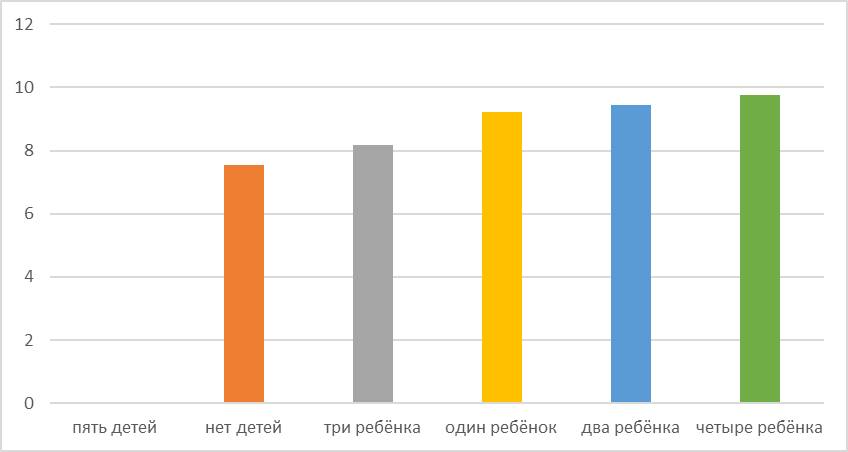

Рекомендация: провести дополнительное исслоедование на выборке с большим кол-вом данных.

**Гипотеза 2 подтверждена.**

* У людей со статусом "вдовец / вдова" и "в разводе" вероятность стать должником — самая низкая.
* Люди живущие в гражданском браке или с не зарегистрированным браком имеют наивысшую верноятность стать должниками.

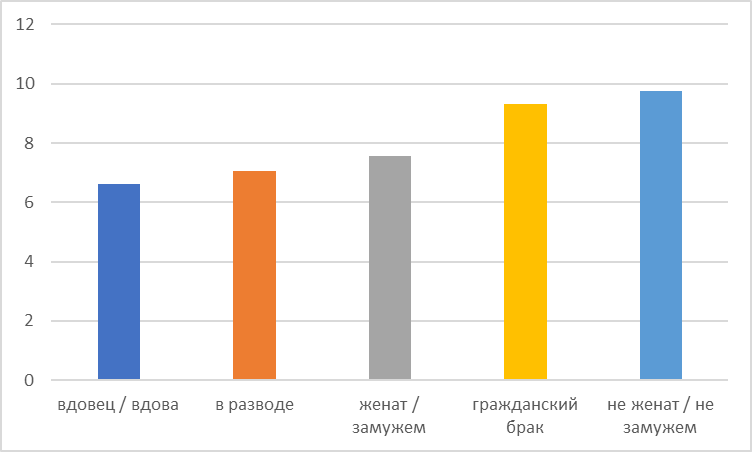

**Гипотеза 3 частично подтверждена:** для более точных выводов необходимо больше данных по категориям A, D и E. 

* 7,06% — доля просроченных кредитов у клиентов с доходом от 200.001 до 1.000.000.
* 8,5% — доля просроченных кредитов у клиентов с доходом от 50.001 до 200.000.

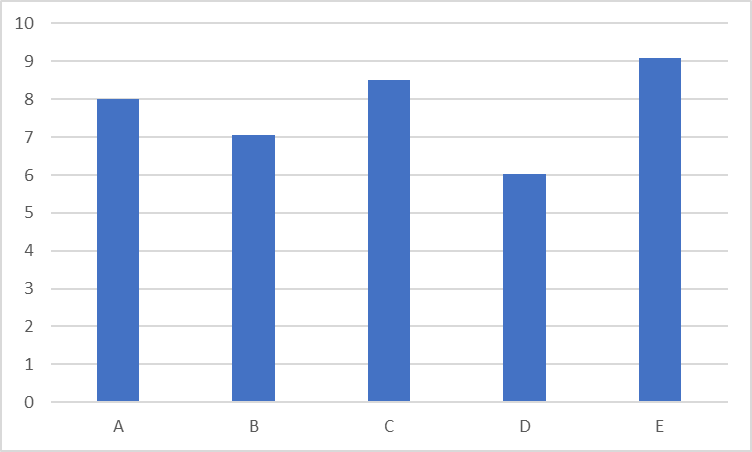

Рекомендация: провести дополнительное исслоедование на выборке с большим кол-вом данных.

**Гипотеза 4 подтверждена.**

* 7,26% — доля просроченных кредитов, целью которых являлись операции с недвижимостью.
* 7,91% — доля просроченных кредитов, целью которых было проведение свадьбы. 
* 9,25% — доля просроченных кредитов, целью которых было получение образования.  
* 9,35% — доля просроченных кредитов, целью которых являлись операции с автомобилем.  

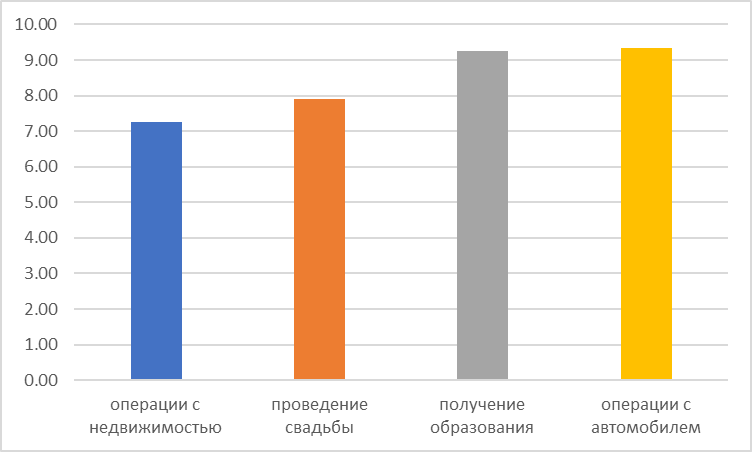

**Общие рекомендации:**

1. Для создания модели крединого скоринга рекомендуется использовать данные из гипотез 2 и 4.
2. Повторно проверить гипотезы 1 и 3 с большим количеством данных.
